151    1
152    1
190    0
Name: status, dtype: int64

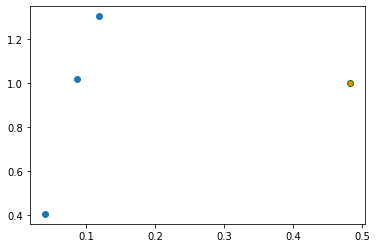

In [ ]:
frequency2=frequency.loc[abn_ind]
ind=np.where(frequency2['status']==0)
plt.scatter(frequency2['MDVP:Shimmer'],frequency2['MDVP:Shimmer(dB)'])
y=frequency.values
plt.scatter(y[ind,1], y[ind,2], edgecolors="g")
frequency2['status']


**Outlier detection using Classification**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Batch 25-2022/Project Batch-25/Data Set/parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:

voice=pd.DataFrame(df[["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","status"]])
status=pd.DataFrame(df[["status"]])
frequency=pd.DataFrame(df[["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","status"]])
frequency=pd.DataFrame(df[["MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","status"]])
frequency=pd.DataFrame(df[["NHR","HNR","status"]])
frequency=pd.DataFrame(df[["spread1","spread2","PPE","RPDE","D2","DFA","status"]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**KNN**

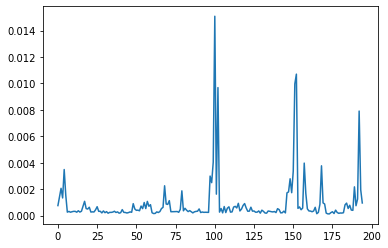

In [ ]:
kn=NearestNeighbors(n_neighbors=5)
kn.fit(frequency)
distance,index=kn.kneighbors(frequency)
plt.plot(distance.mean(axis=1))

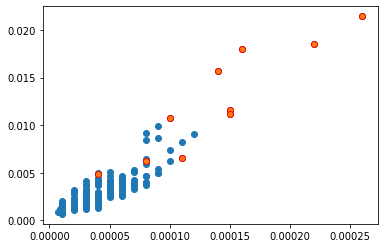

In [ ]:
x=frequency.values
abn_ind=np.where(distance.mean(axis=1)>0.003)
plt.scatter(x[:,1], x[:,2])
plt.scatter(x[abn_ind,1], x[abn_ind,2], edgecolors="r")


In [ ]:
frequency2=frequency.loc[abn_ind]
frequency2['status'].value_counts()

1    8
0    2
Name: status, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

frequency3=frequency2
frequency2=frequency2['status']
X_train, X_test, y_train, y_test = train_test_split(frequency3, frequency2)
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
accuracy=kn.score(X_test,y_test)*100
print("\n Accuracy from frequency : {:.2f}\n".format(accuracy))


 Accuracy from variation : 100.00

